# Visualizing Earnings Based on College Majors

We will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.

FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains info on gender diversity, employement rates, median salaries, and more.

Here are some of the columns in the dataset:

- **Rank** - Rank by median earnings (the dataset is ordered by this column).
- **Major_code** - Major code.
- **Major** - Major description.
- **Major_category** - Category of major.
- **Total** - Total number of people with major.
- **Sample_size** - Sample size for earning info (unweighted) of full-time.
- **Men** - Male graduates.
- **Women** - Female graduates.
- **ShareWomen** - Women as share of total.
- **Employed** - Number employed.
- **Median** - Median salary of full-time, year-round workers.
- **Low_wage_jobs** - Number in low-wage service jobs.
- **Unemployment_rate** - Unemployed / (Unemployed + Employed)
- **Full_time** - Number employed 35 hours or more.
- **Part_time** - Number employed less than 35 hours.

We can begin to explore the correlation between popular majors and salary, the gender breakdown between majors and the category of majors with the most students



## Reading in and Exploring the Data

In [1]:
#lets import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#next let's read the dataset into a dataframe and start exploring the data
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[1])

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [3]:
#now le's explore the data further
print(recent_grads.head())
print('\n')
print(recent_grads.tail())
print('\n')
recent_grads.describe()


   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
#Let's look to remove any missing values
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [5]:
#Looks like there is missing data in a few rows based 
#some columns having 173 vs. 172 values. 
#Let's use the boolean function isnull to find out which one
total_missing = pd.isnull(recent_grads['Total'])
men_missing = pd.isnull(recent_grads['Men'])
women_missing = pd.isnull(recent_grads['Women'])
share_women_missing = pd.isnull(recent_grads['ShareWomen'])

In [6]:
print(recent_grads[total_missing])
print('\n')
print(recent_grads[men_missing])
print('\n')
print(recent_grads[women_missing])
print('\n')
print(recent_grads[share_women_missing])

    Rank  Major_code         Major  Total  Men  Women  \
21    22        1104  FOOD SCIENCE    NaN  NaN    NaN   

                     Major_category  ShareWomen  Sample_size  Employed  \
21  Agriculture & Natural Resources         NaN           36      3149   

        ...        Part_time  Full_time_year_round  Unemployed  \
21      ...             1121                  1735         338   

    Unemployment_rate  Median  P25th  P75th  College_jobs  Non_college_jobs  \
21           0.096931   53000  32000  70000          1183              1274   

    Low_wage_jobs  
21            485  

[1 rows x 21 columns]


    Rank  Major_code         Major  Total  Men  Women  \
21    22        1104  FOOD SCIENCE    NaN  NaN    NaN   

                     Major_category  ShareWomen  Sample_size  Employed  \
21  Agriculture & Natural Resources         NaN           36      3149   

        ...        Part_time  Full_time_year_round  Unemployed  \
21      ...             1121                  173

In [7]:
#drop the missing values
recent_grads.dropna(inplace=True)

In [8]:
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)
recent_grads.head()

172


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Graphing the Data

Now that we have explored and cleaned the data, let's begin to explore the data through visualizions 

Let's first geneerate some scatter plots to explore:
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

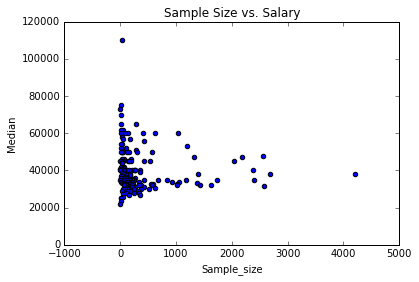

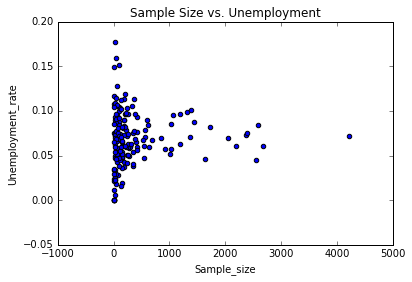

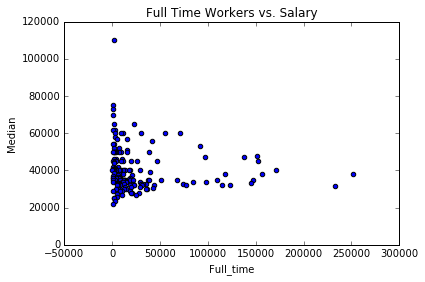

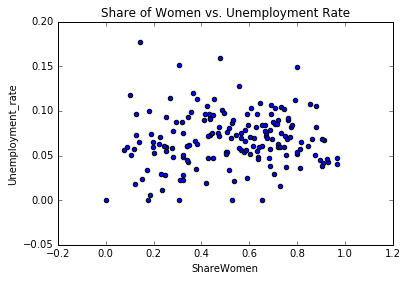

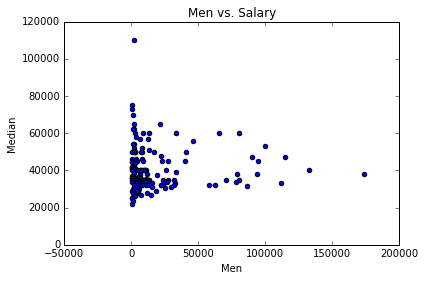

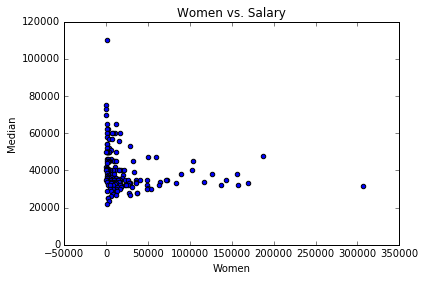

In [9]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_title('Sample Size vs. Salary')
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_title('Sample Size vs. Unemployment')
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('Full Time Workers vs. Salary')
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_title('Share of Women vs. Unemployment Rate')
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title('Men vs. Salary')
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax6.set_title('Women vs. Salary')

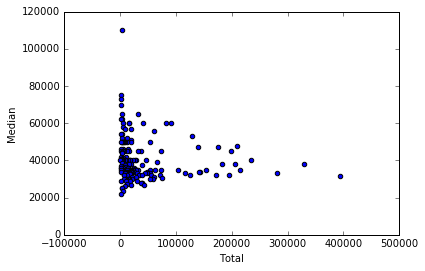

In [10]:
ax7 = recent_grads.plot(x='Total', y='Median', kind='scatter')
ax1.set_title('Total vs. Salary')

## Do students in more popular majors make more money?
Looking at the scatter plot to compare the total number of people in majors vs. the median salary, I want to explore if a relationship exists between how popular a major may be and the median salary. Looking at the data, it looks like there doesnt seem to be any correlation between how popular a major is and how much money graduates in those majors make. If anything, it looks like as you enter a major with increasing popularity, your median salary decreased to a certain floor. That's to say that the more popular a major is, the more competitive the job market becomes for those of that major, allowing companies to pull from a wide pool of talent.

## Do students that majored in subjects that were majority female make more money?

To look at this relationship and question, let's look at the share of Women vs. Median Income. 


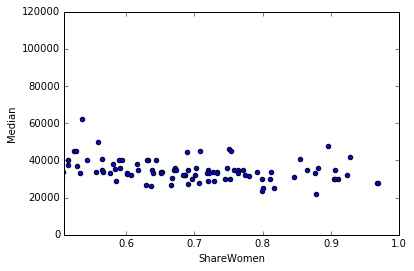

In [11]:
ax8 = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', xlim = (0.51, 1))
ax1.set_title('Share of Women vs. Salary')

It looks like the relationship between majors where the majority of students were female and median income is neutral to slightly negative - as majors with more women enter the workforce, they tend to make the same or a little less money. This could signify that women are underpaid.


## Is there a link between the number of full-time employees and salary?

Looking at the graph that shares the relationship between the number of full time employees per major and median income, it looks like as those majors with more full time employees increases, the median salary slowly declines. Again, this may just signify a relationship in the degree of talent pool certain companies have access to, where certain majors are more popular in the job market than others

## Data Exploration using Pandas and Histograms

Next, let's explore the data by generating numerous histograms to explore the following columns:
- Sample Size
- Median Salary
- Number of Employed
- Full Time Workers
- Share of Women in a major
- Unemployment Rate
- Number of Men in a major
- Number of Women in a major

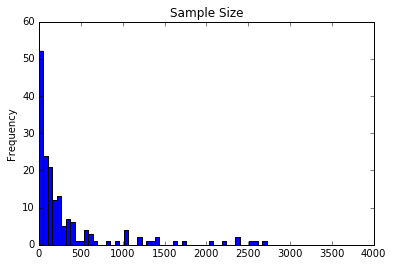

In [12]:
# Histogram of Sample Size
his1 = recent_grads['Sample_size'].plot(kind = 'hist', bins=75, title= 'Sample Size', range = (0, 4000))

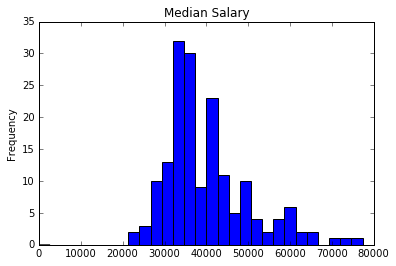

In [13]:
# Histogram of Median Salary
his2 = recent_grads['Median'].plot(kind = 'hist', bins=30, title= 'Median Salary', range = (0, 80000))

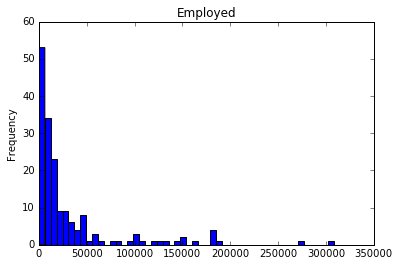

In [14]:
# Histogram of Employed 
his3 = recent_grads['Employed'].plot(kind = 'hist', bins=50, title= 'Employed')

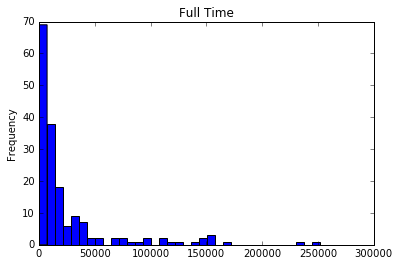

In [15]:
# Histogram of Full Time Workers 
his3 = recent_grads['Full_time'].plot(kind = 'hist', bins=35, title= 'Full Time')

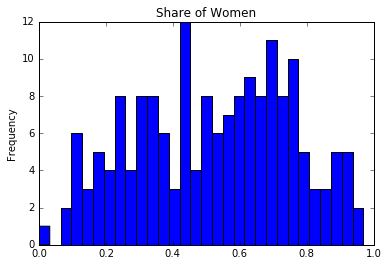

In [16]:
# Histogram of Share of Women 
his4 = recent_grads['ShareWomen'].plot(kind = 'hist', bins=30, title= 'Share of Women')

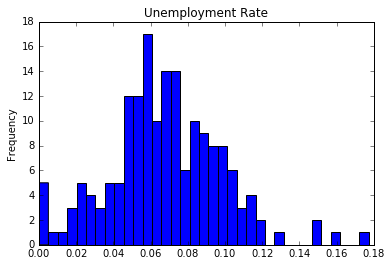

In [17]:
# Histogram of Unemployment Rate 
his5 = recent_grads['Unemployment_rate'].plot(kind = 'hist', bins=35, title= 'Unemployment Rate')

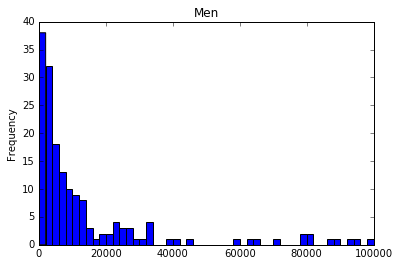

In [18]:
# Histogram of Men
his6 = recent_grads['Men'].plot(kind = 'hist', bins=50, title= 'Men', range = (0, 100000))

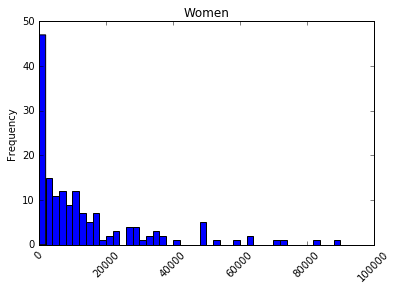

In [19]:
his6 = recent_grads['Women'].plot(kind = 'hist', bins = 50, rot = 45, title = 'Women', range = (0,100000))

Looking at the histograms for Sample Size, Median, Employed, Full Time, Men and Women, you can see the distribution of their frequencies is heavily skewed right, which could be a result of data collection over two years as data continues to come in. 

The Share of Women and Unemployement histograms show a more even distribution, as their numbers aren't counts but proportions. The Unemployment rate has the most "normal' distribution with the highest rate being 6%. The Shar of Women seems to rise and fall every 2%, but overall not really showing a specific trend or pattern. 

Seems like most of the frequencies for Salary fall within 30 to 50k, with the highest being around 35k. 

## Pandas, Scatter Matrix Plot

Next, let's explore using a scatter matrix plot. 

In [20]:
#import the function from pandas plotting module
from pandas.plotting import scatter_matrix

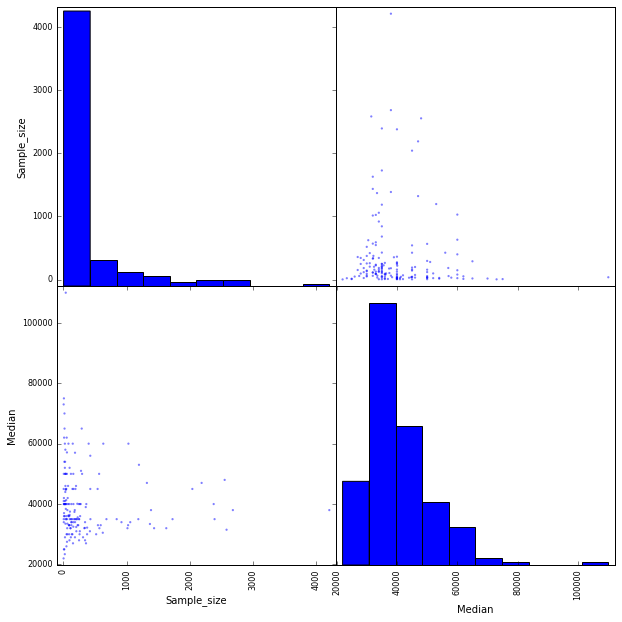

In [21]:
#Create 2 by 2 scatter matrix plot using Sample Size and Median
sm1 = scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa797071e80>,
      dtype=object)

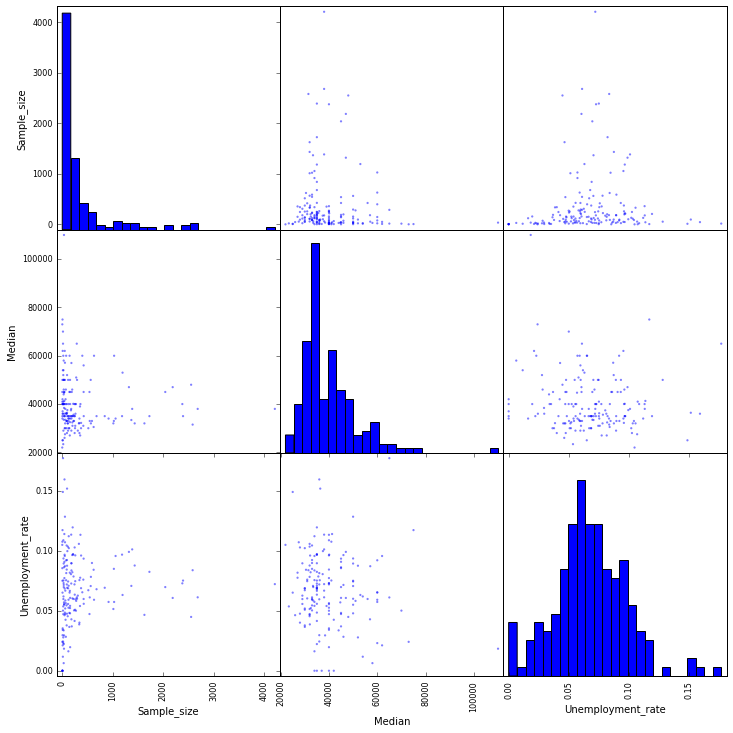

In [22]:
#Create a 3 by 3 scatter matrix plot using Sample Size, Median, Unemployment
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(12,12), hist_kwds={'bins':25})

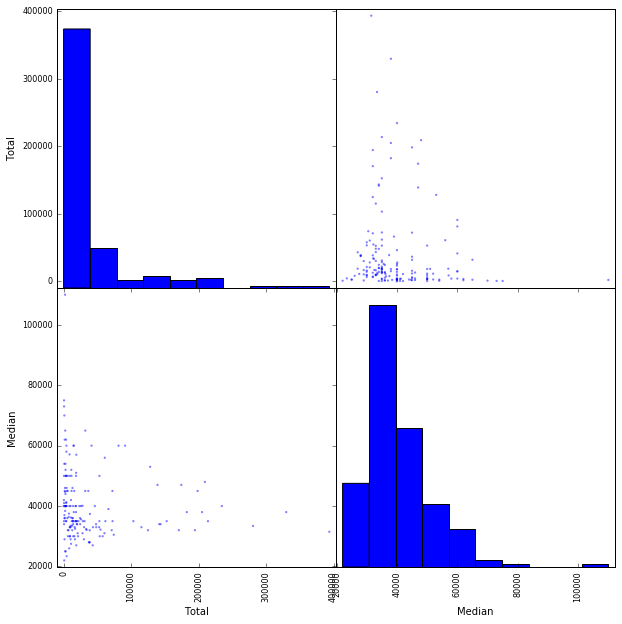

In [23]:
#explore the relationship between Total and Median
sm1 = scatter_matrix(recent_grads[['Total', 'Median']], figsize=(10,10))

The Scatter-Matrix plot of Total and Median confirms the aggregation of data at less popular majors and the median income of $30k to 50k. Overall, the popular Major courses expect to have lower maximum Median income than less popular Major subjects.

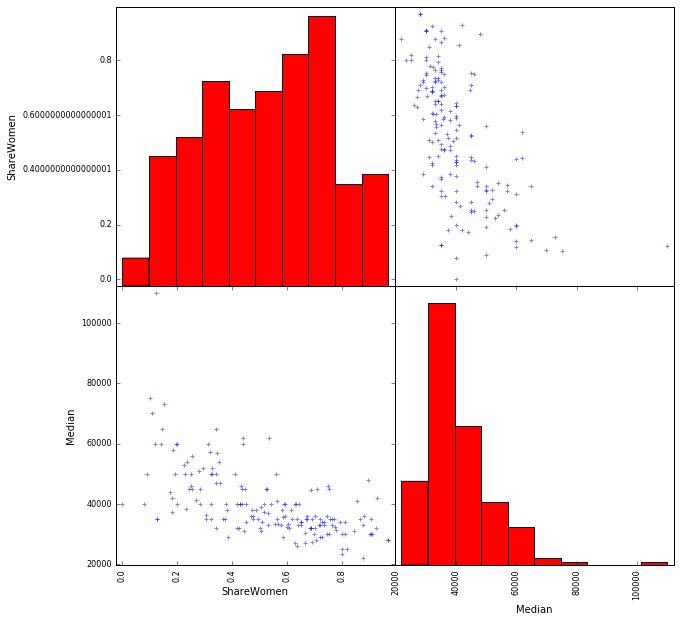

In [24]:
#Exploring relationship between Share of Women and Median
sm1 = scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(10,10), marker = '+', hist_kwds={'color':'red'})

The Median Histogram showcases data aggregation around 30-50k range. It also shows that majors where the larger the share of women, the lower the median income tends to go. 

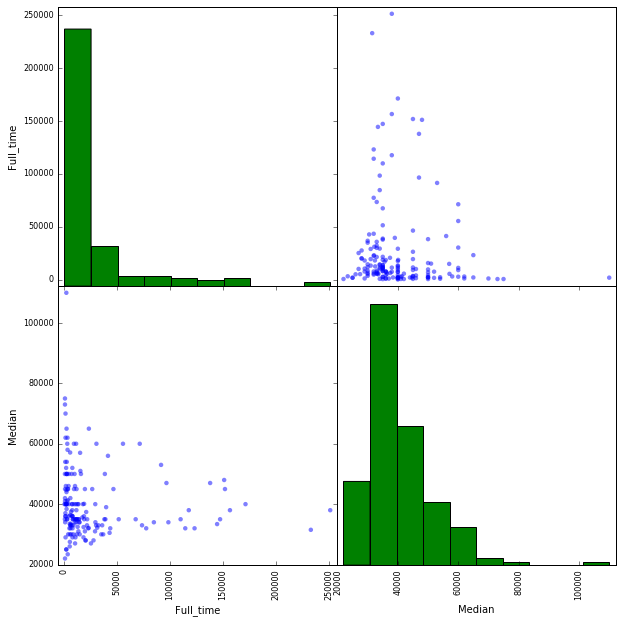

In [25]:
#Explore the relationship between Full_time and Median
sm1 = scatter_matrix(recent_grads[['Full_time', 'Median']], marker='o', hist_kwds={'color':'green'}, figsize=(10,10))

Looking at the above, we can see that as the number of full-time employees increases, the lower the median income. 

## Pandas, Bar Plots

Now let's explore this data by building bar plots.

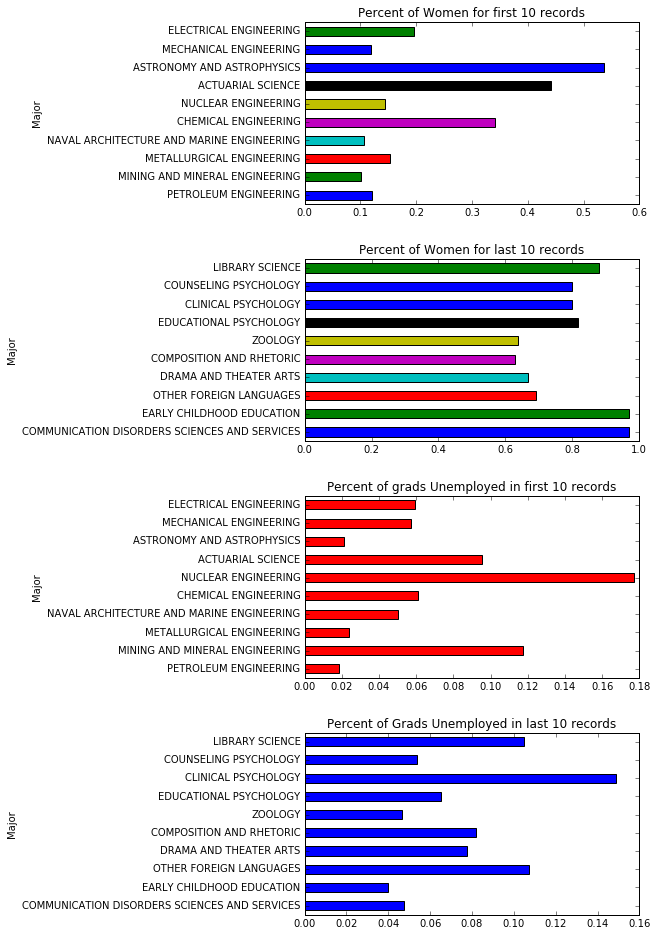

In [26]:
#Bar Plots for the first 10 and last 10 majors
fig, [(ax1), (ax2), (ax3), (ax4)] = plt.subplots(nrows=4, ncols=1, figsize=(6,16))
plt.subplots_adjust(hspace=.3)
recent_grads.head(10).plot(ax=ax1,
                           x='Major',
                           y='ShareWomen',
                           kind='barh',
                           legend=False,
                           title='Percent of Women for first 10 records',
                          )
recent_grads.tail(10).plot(ax=ax2,
                           x='Major',
                           y='ShareWomen',
                           kind='barh',
                           legend=False,
                           title='Percent of Women for last 10 records',
                           )
recent_grads.head(10).plot(ax=ax3,
                          x='Major',
                          y='Unemployment_rate',
                          kind='barh',
                          legend=False,
                          title='Percent of grads Unemployed in first 10 records',
                          color = 'red'
                         )
recent_grads.tail(10).plot(ax=ax4,
                           x="Major",
                           y='Unemployment_rate',
                           kind='barh',
                           legend=False,
                           title='Percent of Grads Unemployed in last 10 records',
                           color = 'blue'
                          )










**Observations**

The bar plots show the first and last ten records from the ranked data. As the data is ranked by median income, the first and last groups have the highest and lowest median salary respectively.

Share of Women:
- It looks like the share of women in the top 10 ranked majors sits at around 10-55% of women vs. the bottom 10 majors where a majority of women occupy those majors - between 60-90%
- In the top 10 majors, the highest share of women is in Astronomy and Astrophysics, and Actuarial Sciences 
- In the bottom 10 marjos, the highest share of women is in Early Childhood Education and Communication Disorders, Sciences and Services. 

Unemployment Rate:
- The Unemployment rates between the top and bottom 10 majors seem to sit pretty evenly.
- Nuclear Engineering and Mining and Mineral Engineering have the highest unemployment rate of top 10 majors at around 18 and 12% respectively; Petroleum Engineering, Metallurgical Engineering and Astrophysics have the lowest unemployments at around 2%.
-Meanwhile, the bottom 10 majors have slightly higher rates. Clinical Psychology, Foreign Languages, and Library Science have highest unemployment between 11 and 15%. 

Let's keep exploring with other visualizations such as:
- Use a grouped bar plot to compare number of men with number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier. 

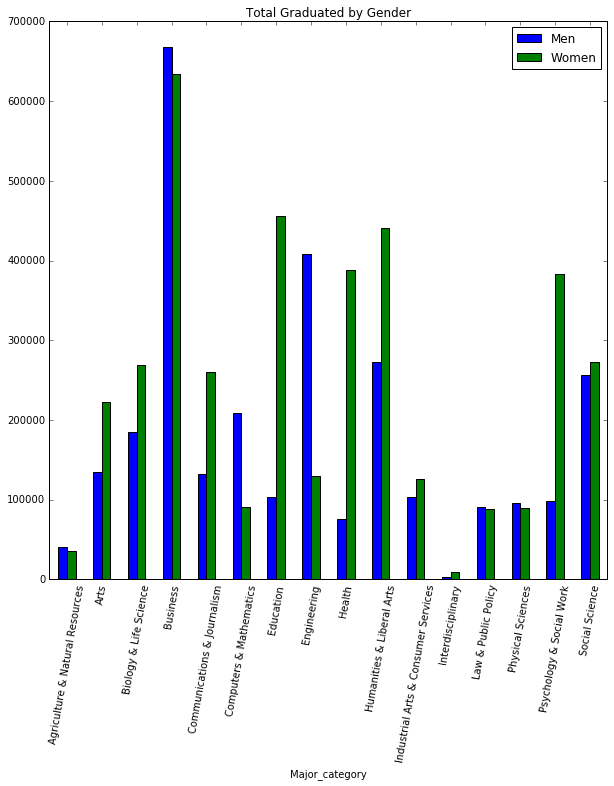

In [27]:
#First lets explore men and women by major category
ax =(recent_grads[['Major_category', 'Men', 'Women']].groupby('Major_category').sum().plot.bar(title='Total Graduated by Gender',rot =80,figsize=(10,10)))

ax.set_ylabel=('Number of Graduated')


- The highest number of graduates in any major is Business, while the least amount is in Interdisciplinary. 
- It looks like the biggest difference is in Health, Education and Social Work where Women make up the majority of graduates. For men, it seems Computer and Math and Engineering hold the most amount, compared to women. 

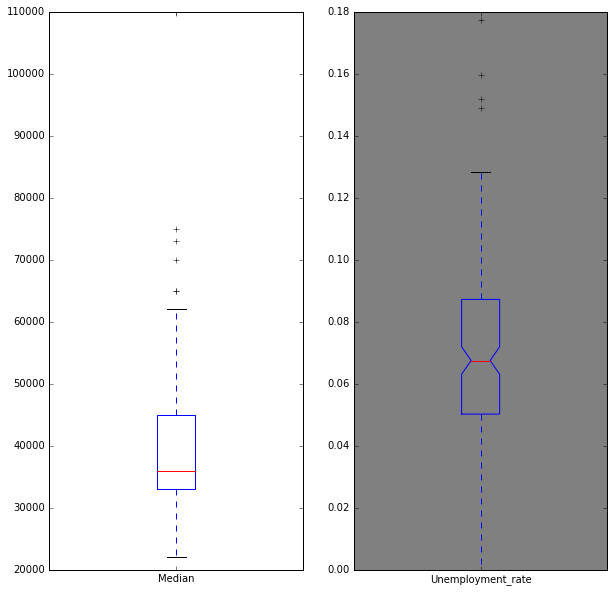

In [28]:
#Let's use a box plot to explore distributions in salaries and unemployment rate.
fig, [(ax1), (ax2)] = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
recent_grads['Median'].plot.box(ax=ax1)
ax1.set_title=('Median BoxPlot')
recent_grads['Unemployment_rate'].plot.box(notch=True,ax=ax2)
ax2.set_title=('Unemployment Rate')
ax2.set_axis_bgcolor('grey')


It looks like the distribution of median salary is much larger, with data aggregation shown on the lower end where average salary is between 35 and 45k, with the highest around 60k. 

For unemployment rate, we have a wider distribution across a 0 to 13% range. 75% of values is at 9% or lower for unemployment, with half of majors sitting at around 5 and 9% unemployment. 

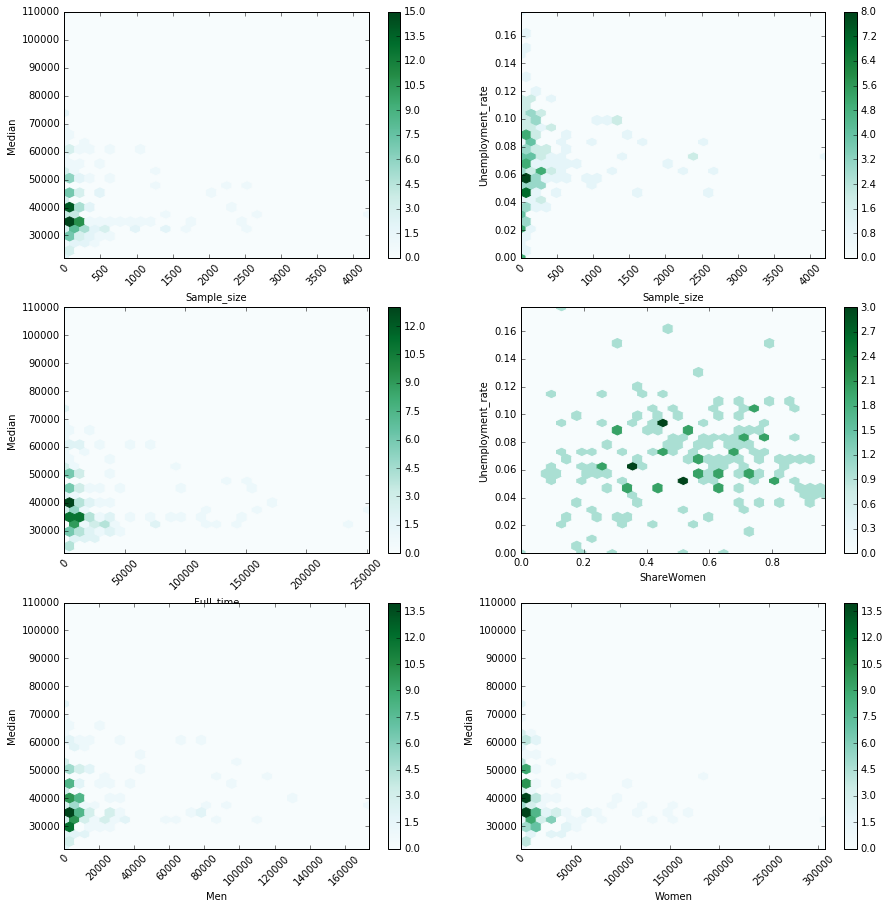

In [40]:
#Finally let's explore a hexagonal bin plot to visualize 
#the columns that had dense scatter plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=30, ax=axs[0,0], rot=45)
recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=30, ax=axs[0,1], rot=45)
recent_grads.plot.hexbin(x='Full_time', y='Median', gridsize=30, ax=axs[1,0], rot=45)
recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate', gridsize=30, ax=axs[1,1])
recent_grads.plot.hexbin(x='Men', y='Median', gridsize=30, ax=axs[2,0], rot=45)
recent_grads.plot.hexbin(x='Women', y='Median', gridsize=30, ax=axs[2,1], rot=45)


Looking at the above bin plots and the density within each, it seems there is little to no relationship between the share of women in a major and the unemployment rate of those majors. 

It also looks like people that graduated from prevalent majors can expect an average unemployment rate and median salary of around 35 to 45k. If anything, it looks like women see a larger spread in median salary vs. men which sees a tighter cluser of median salary between 30 and 45k. 

It looks like the unemployment rate and salary of certain majors is more affected by the prevalancy of higher popularity majors that leads to more competition for jobs in the market.

## Conclusion 

In this project, we uses plotting tools built into pandas to explore data on job outcomes.